In [1]:
import numpy as np
import pandas as pd
import warnings
import calendar
warnings.filterwarnings('ignore')

# import libraties
import matplotlib.pyplot as plt
import seaborn as sns
#Suppressing scientific notation to float only 
pd.options.display.float_format = '{:,.2f}'.format

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
#Reading file for Gaming Accessory
GamingAccessory = pd.read_csv('GamingAccessory.csv')
GamingAccessory.head()

,Unnamed: 0,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
0,1555,2015-10-04,2015,10,"1,408,216,975,064,600.00","1,408,216,975,064,600.00","3,075.00",1,0,0,...,nan,0.12,0.06,0.18,-0.26,-0.16,-0.34,0.12,0.06,0.18
1,1556,2015-10-14,2015,10,"1,416,985,339,691,600.00","1,416,985,339,691,600.00","2,750.00",1,0,0,...,nan,-0.05,0.05,-0.01,0.14,-0.10,0.02,-0.05,0.05,-0.01
2,1557,2015-10-15,2015,10,"1,417,669,228,375,400.00","1,417,669,228,375,400.00","2,899.00",1,0,0,...,nan,0.11,0.05,0.05,-0.21,-0.10,-0.12,0.11,0.05,0.05
3,1558,2015-10-17,2015,10,"1,419,414,998,353,400.00","1,419,414,998,353,400.00","2,609.00",1,0,0,...,0.19,-0.06,-0.05,-0.13,0.13,0.11,0.39,-0.06,-0.05,-0.13
4,1559,2015-10-26,2015,10,"1,427,167,582,532,600.00","1,427,167,582,532,600.00","2,772.00",1,0,0,...,-0.01,0.01,-0.08,-0.10,-0.02,0.23,0.33,0.01,-0.08,-0.10


In [3]:
GamingAccessory = GamingAccessory.drop(['Unnamed: 0'], axis=1)
GamingAccessory.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
0,2015-10-04,2015,10,"1,408,216,975,064,600.00","1,408,216,975,064,600.00","3,075.00",1,0,0,COD,...,nan,0.12,0.06,0.18,-0.26,-0.16,-0.34,0.12,0.06,0.18
1,2015-10-14,2015,10,"1,416,985,339,691,600.00","1,416,985,339,691,600.00","2,750.00",1,0,0,COD,...,nan,-0.05,0.05,-0.01,0.14,-0.10,0.02,-0.05,0.05,-0.01
2,2015-10-15,2015,10,"1,417,669,228,375,400.00","1,417,669,228,375,400.00","2,899.00",1,0,0,Prepaid,...,nan,0.11,0.05,0.05,-0.21,-0.10,-0.12,0.11,0.05,0.05
3,2015-10-17,2015,10,"1,419,414,998,353,400.00","1,419,414,998,353,400.00","2,609.00",1,0,0,Prepaid,...,0.19,-0.06,-0.05,-0.13,0.13,0.11,0.39,-0.06,-0.05,-0.13
4,2015-10-26,2015,10,"1,427,167,582,532,600.00","1,427,167,582,532,600.00","2,772.00",1,0,0,Prepaid,...,-0.01,0.01,-0.08,-0.10,-0.02,0.23,0.33,0.01,-0.08,-0.10


In [4]:
# Drop lag, MA and GMV columns
GamingAccessory = GamingAccessory.drop(['inc_LP_MA1','inc_LP_MA2','inc_LP_MA3','inc_PO_MA1','inc_PO_MA2','inc_PO_MA3','LP_lag_1_per',
           'LP_lag_2_per','LP_lag_3_per','PO_lag_1_per-1','PO_lag_1_per-2','PO_lag_1_per-1','GMV_lag_2_per',
           'GMV_lag_3_per','PO_lag_1_per-3'], axis=1)
GamingAccessory.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,GMV_lag_1_per
0,2015-10-04,2015,10,"1,408,216,975,064,600.00","1,408,216,975,064,600.00","3,075.00",1,0,0,COD,...,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00,0.12
1,2015-10-14,2015,10,"1,416,985,339,691,600.00","1,416,985,339,691,600.00","2,750.00",1,0,0,COD,...,"20,812,731.13","42,753,560.50","286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00,-0.05
2,2015-10-15,2015,10,"1,417,669,228,375,400.00","1,417,669,228,375,400.00","2,899.00",1,0,0,Prepaid,...,"24,281,519.65","49,879,153.92","334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00,0.11
3,2015-10-17,2015,10,"1,419,414,998,353,400.00","1,419,414,998,353,400.00","2,609.00",1,0,0,Prepaid,...,"26,015,913.91","53,441,950.62","358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00,-0.06
4,2015-10-26,2015,10,"1,427,167,582,532,600.00","1,427,167,582,532,600.00","2,772.00",1,0,0,Prepaid,...,"26,883,111.04","55,223,348.98","370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00,0.01


In [5]:
GamingAccessory['GMV_lag_1_per'] = GamingAccessory['GMV_lag_1_per'].fillna(0)

In [6]:
GamingAccessory['GMV_lag_1_per'].isna().sum()

0

In [7]:
GamingAccessory = GamingAccessory.drop(['order_date', 'Year', 'Month', 'order_id', 'order_item_id', 'week', 'week_y', 'month_date'], 
                            axis=1)
GamingAccessory.head()

,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,...,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,GMV_lag_1_per
0,"3,075.00",1,0,0,COD,9,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00,0.12
1,"2,750.00",1,0,0,COD,7,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,"20,812,731.13","42,753,560.50","286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00,-0.05
2,"2,899.00",1,0,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,"24,281,519.65","49,879,153.92","334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00,0.11
3,"2,609.00",1,0,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,"26,015,913.91","53,441,950.62","358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00,-0.06
4,"2,772.00",1,0,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,"26,883,111.04","55,223,348.98","370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00,0.01


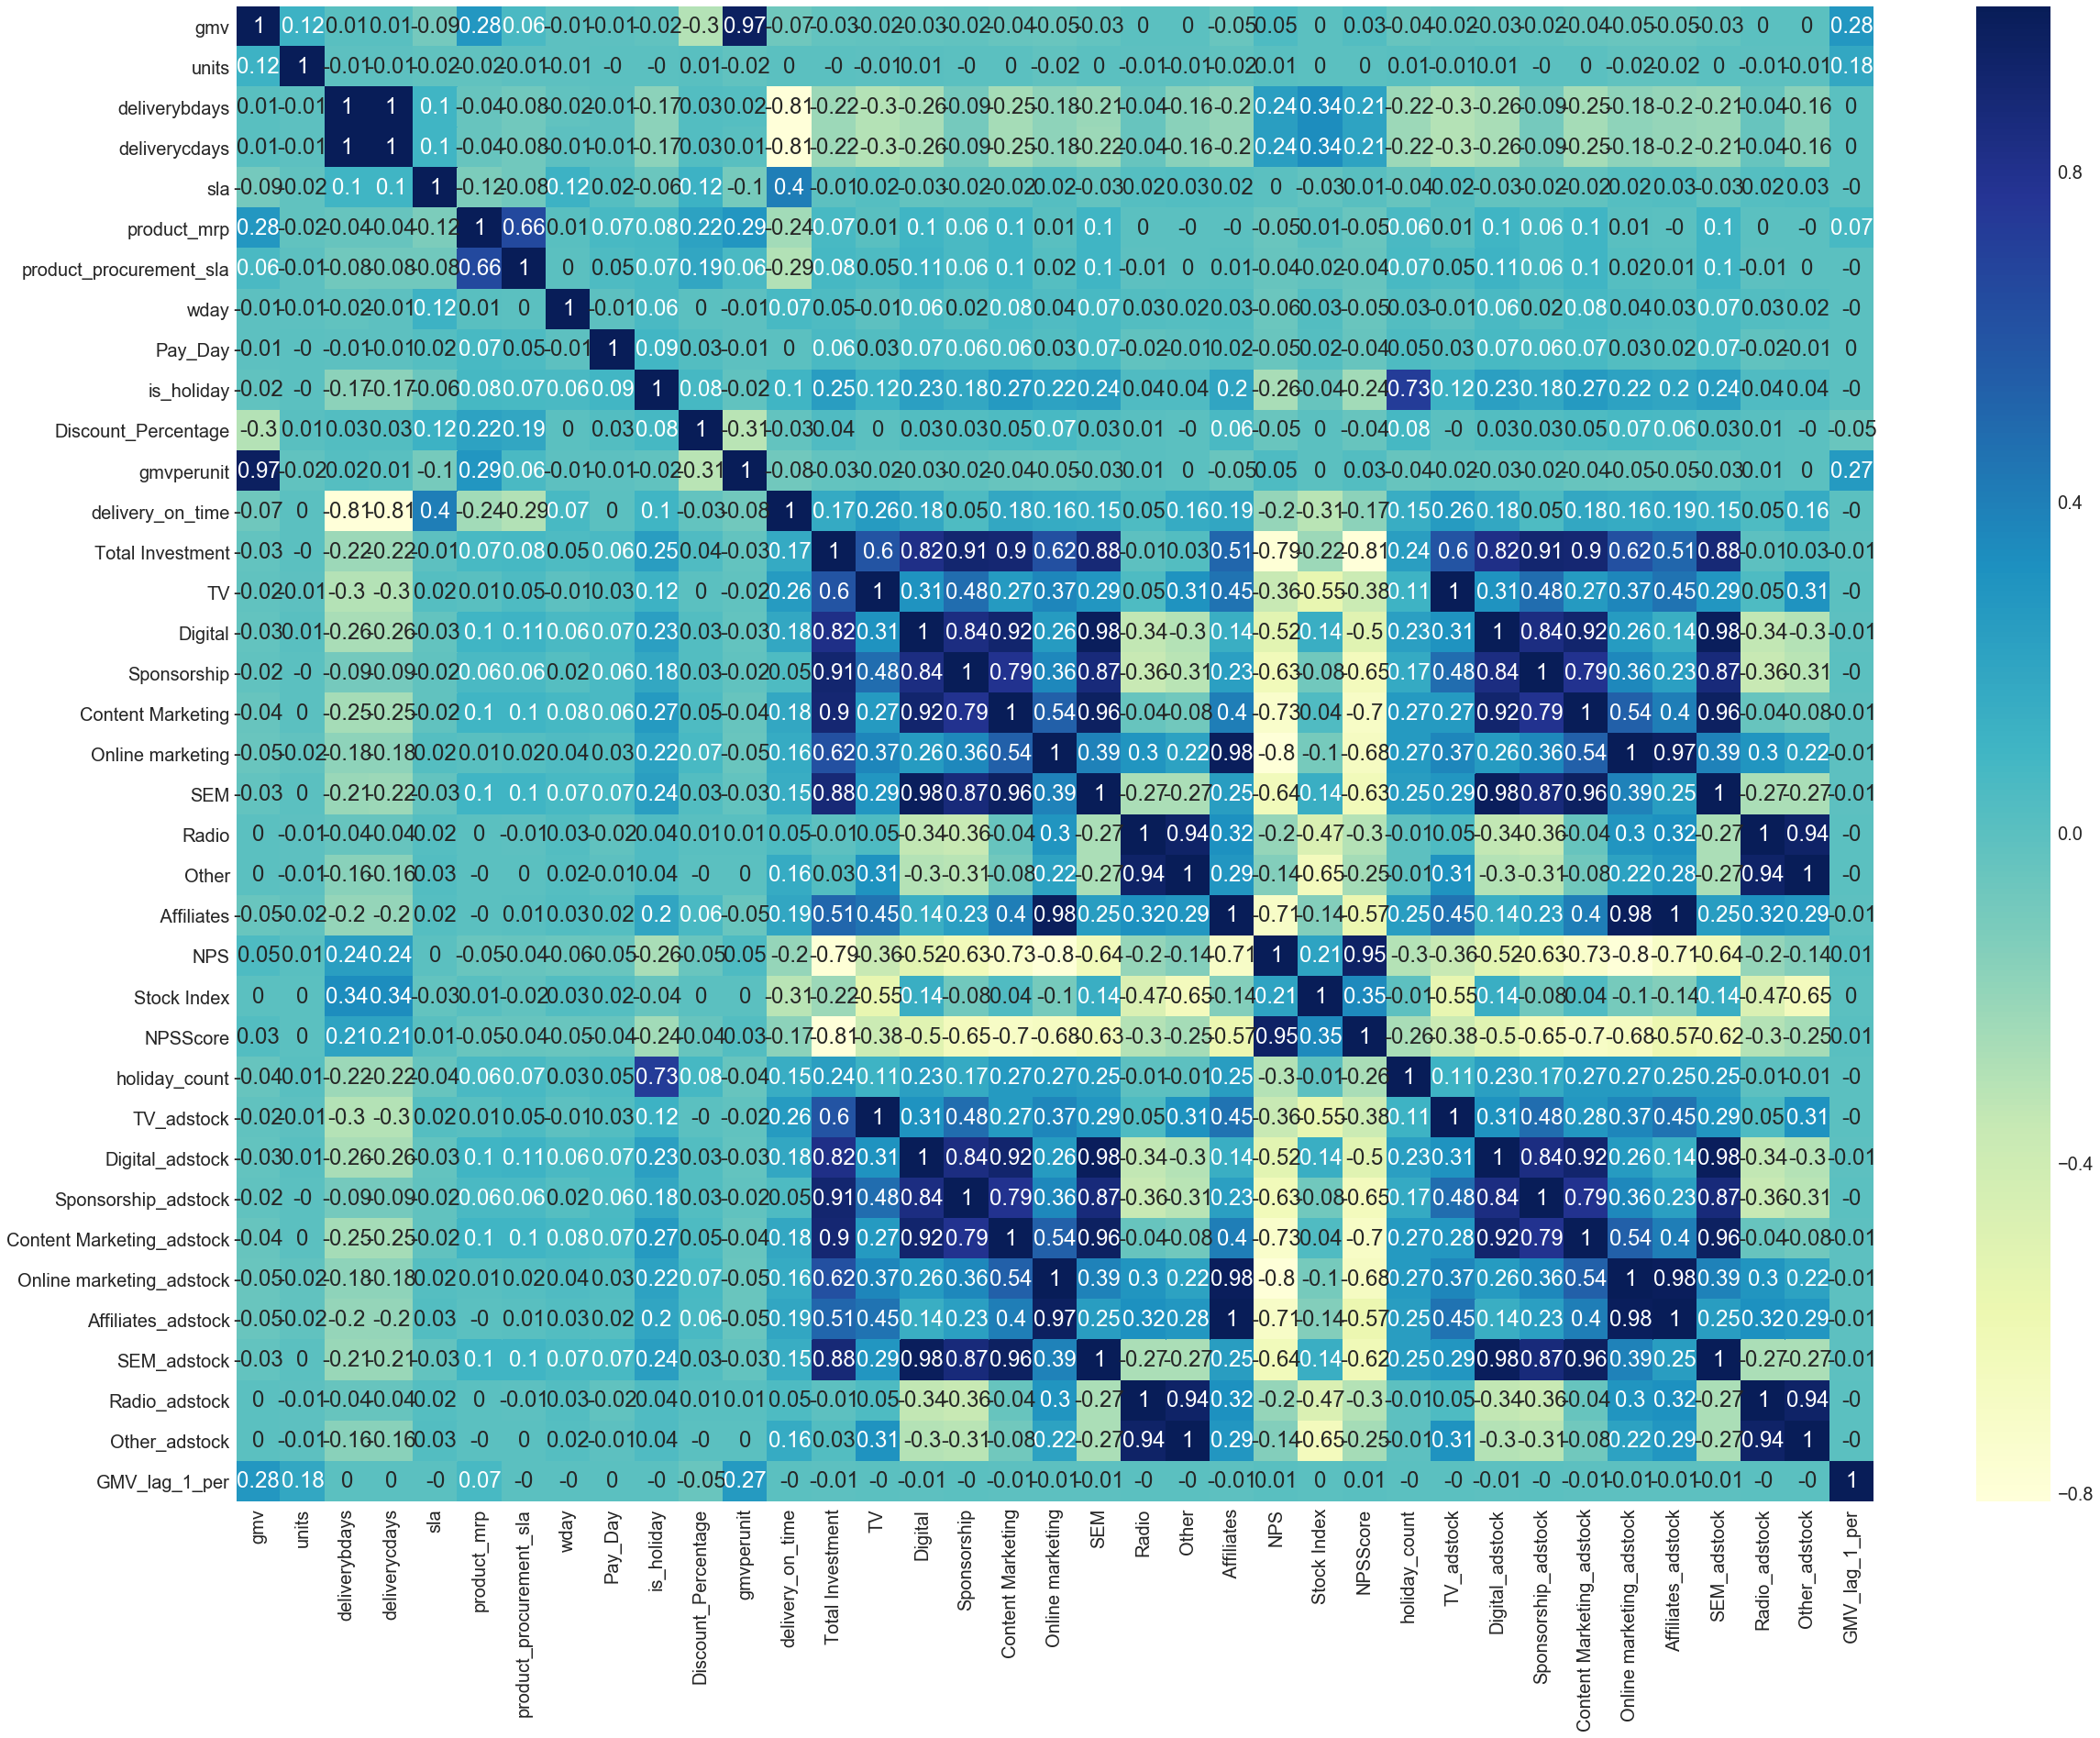

In [8]:
# Plotting a heatmap of the selected variables
plt.figure(figsize=(40, 30))
sns.set(font_scale=2)
sns.heatmap(round(GamingAccessory.corr(), 2), annot=True, cmap="YlGnBu")

In [9]:
GamingAccessory = GamingAccessory.drop(['gmvperunit', 'deliverybdays', 'SEM_adstock', 'Digital_adstock', 
                              'Content Marketing_adstock', 'Affiliates_adstock', 'Radio_adstock', 'Other_adstock', 
                               'Online marketing_adstock', 'Sponsorship_adstock', 'TV_adstock'], axis=1)

GamingAccessory.head()

,gmv,units,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,...,SEM,Radio,Other,Affiliates,NPS,Stock Index,NPSScore,holiday_count,ItemType,GMV_lag_1_per
0,"3,075.00",1,0,COD,9,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,0.00,Luxury,0.12
1,"2,750.00",1,0,COD,7,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,4.00,Luxury,-0.05
2,"2,899.00",1,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,4.00,Luxury,0.11
3,"2,609.00",1,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,4.00,Luxury,-0.06
4,"2,772.00",1,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,0.00,Luxury,0.01


In [10]:
GamingAccessory.columns

Index(['gmv', 'units', 'deliverycdays', 's1_fact_order_payment_type', 'sla',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'wday', 'Pay_Day', 'is_holiday', 'special_sale', 'Discount_Percentage',
       'delivery_on_time', 'delivery_status', 'Total Investment', 'TV',
       'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing',
       'SEM', 'Radio', 'Other', ' Affiliates', 'NPS', 'Stock Index',
       'NPSScore', 'holiday_count', 'ItemType', 'GMV_lag_1_per'],
      dtype='object')

In [11]:
GamingAccessory.isnull().sum()

gmv                              0
units                            0
deliverycdays                    0
s1_fact_order_payment_type       0
sla                              0
product_analytic_category        0
product_analytic_sub_category    0
product_analytic_vertical        0
product_mrp                      0
product_procurement_sla          0
wday                             0
Pay_Day                          0
is_holiday                       0
special_sale                     0
Discount_Percentage              0
delivery_on_time                 0
delivery_status                  0
Total Investment                 0
TV                               0
Digital                          0
Sponsorship                      0
Content Marketing                0
Online marketing                 0
SEM                              0
Radio                            0
Other                            0
 Affiliates                      0
NPS                              0
Stock Index         

In [12]:
GamingAccessory.rename({" Affiliates": "Affiliates"}, axis=1, inplace=True)

In [13]:
GamingAccessory.shape

(170712, 33)

In [14]:
##describe() function alongwith percentiles parameter to get a spread of the data in the numeric columns
GamingAccessory.describe()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,Online marketing,SEM,Radio,Other,Affiliates,NPS,Stock Index,NPSScore,holiday_count,GMV_lag_1_per
count,"170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00",...,"170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00"
mean,838.76,1.03,1.33,5.71,"2,021.35",2.56,2.99,0.07,0.20,46.18,...,"43,343,295.63","20,183,731.52","1,172,797.93","11,904,502.32","13,684,660.51",48.37,"1,158.34",11.11,1.15,0.09
std,"1,222.51",0.27,2.64,2.54,"5,389.82",1.79,1.93,0.25,0.40,22.97,...,"13,847,355.77","19,652,221.74","1,964,867.99","20,597,714.25","4,006,399.16",2.69,87.33,0.77,1.65,1.28
min,39.00,1.00,0.00,0.00,120.00,0.00,0.00,0.00,0.00,0.00,...,"291,841.89","5,675,708.40",0.00,0.00,"166,383.18",44.40,"1,015.00",10.03,0.00,-0.99
25%,284.00,1.00,0.00,4.00,599.00,2.00,1.00,0.00,0.00,29.07,...,"41,633,783.21","9,846,568.91",0.00,0.00,"14,039,892.47",47.00,"1,052.00",10.63,0.00,0.00
50%,449.00,1.00,0.00,6.00,950.00,2.00,3.00,0.00,0.00,45.67,...,"48,016,056.55","11,763,933.86",0.00,0.00,"15,390,121.96",47.31,"1,210.00",10.97,0.00,0.00
75%,924.00,1.00,0.00,7.00,"1,792.00",3.00,5.00,0.00,0.00,62.63,...,"51,709,677.42","15,603,225.81","1,964,516.13","11,260,967.74","15,605,218.38",50.33,"1,228.00",12.09,3.00,0.00
max,"49,999.00",15.00,42.00,60.00,"65,000.00",14.00,6.00,1.00,1.00,98.60,...,"55,033,046.50","72,093,251.50","6,096,774.19","61,170,967.74","16,641,935.48",59.99,"1,242.00",13.55,6.00,174.85


In [15]:
GamingAccessory['delivery_on_time'].unique()

array([  4.,   2.,   0.,  -1.,   1.,   5.,   6.,   7.,   8.,   9.,  10.,
        13.,   3.,  11.,  16.,  14.,  -3.,  -2.,  17.,  15.,  12., -13.,
       -12.,  -9., -11.,  -8., -10.,  -7.,  -5.,  -4.,  -6.,  19.,  18.,
       -14.,  21., -15., -16., -61., -19.,  20.,  59., -20., -25., -22.,
       -24., -18., -17., -23., -21., -45., -28., -75., -64., -50., -33.,
       -36.,  24., -29., -27., -44., -39., -26., -34., -31., -30., -37.])

In [16]:
GamingAccessory=GamingAccessory.loc[(GamingAccessory['delivery_on_time']>0)]
GamingAccessory.head()

,gmv,units,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,...,SEM,Radio,Other,Affiliates,NPS,Stock Index,NPSScore,holiday_count,ItemType,GMV_lag_1_per
0,"3,075.00",1,0,COD,9,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,0.00,Luxury,0.12
1,"2,750.00",1,0,COD,7,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,4.00,Luxury,-0.05
5,"2,750.00",1,0,Prepaid,7,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,4.00,Luxury,-0.08
7,"3,079.00",1,0,Prepaid,7,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,0.00,Luxury,0.06
8,"2,899.00",1,0,COD,6,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,0.00,Luxury,0.05


In [17]:
GamingAccessory.shape

(106810, 33)

In [18]:
# Subset all categorical variables
GamingAccessory_categorical = GamingAccessory.select_dtypes(include=['object'])
GamingAccessory_categorical.head()

,s1_fact_order_payment_type,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,special_sale,delivery_status,ItemType
0,COD,GamingHardware,GamingAccessory,GamePad,Regular Day,Early,Luxury
1,COD,GamingHardware,GamingAccessory,GamePad,Regular Day,Early,Luxury
5,Prepaid,GamingHardware,GamingAccessory,GamePad,Daussera,Early,Luxury
7,Prepaid,GamingHardware,GamingAccessory,GamePad,Regular Day,Early,Luxury
8,COD,GamingHardware,GamingAccessory,GamePad,Regular Day,Early,Luxury


In [19]:
# Subset all numerical variables
GamingAccessory_numerical = GamingAccessory.select_dtypes(include=['int64','float64'])
GamingAccessory_numerical.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,Online marketing,SEM,Radio,Other,Affiliates,NPS,Stock Index,NPSScore,holiday_count,GMV_lag_1_per
0,"3,075.00",1,0,9,"3,999.00",5,6,0,0,23.11,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,0.00,0.12
1,"2,750.00",1,0,7,"3,999.00",5,2,0,0,31.23,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,4.00,-0.05
5,"2,750.00",1,0,7,"3,999.00",5,4,0,1,31.23,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,4.00,-0.08
7,"3,079.00",1,0,7,"3,999.00",5,5,0,0,23.01,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,0.00,0.06
8,"2,899.00",1,0,6,"3,999.00",5,0,0,0,27.51,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,0.00,0.05


In [20]:
# Convert into dummies
dummies = pd.get_dummies(GamingAccessory_categorical, drop_first=True)
dummies.head()

,s1_fact_order_payment_type_Prepaid,product_analytic_vertical_GameControlMount,product_analytic_vertical_GamePad,product_analytic_vertical_GamingAccessoryKit,product_analytic_vertical_GamingAdapter,product_analytic_vertical_GamingChargingStation,product_analytic_vertical_GamingHeadset,product_analytic_vertical_GamingKeyboard,product_analytic_vertical_GamingMemoryCard,product_analytic_vertical_GamingMouse,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [21]:
# Drop categorical variable columns
GamingAccessory = GamingAccessory.drop(list(GamingAccessory_categorical.columns), axis=1)

In [22]:
GamingAccessory.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,Online marketing,SEM,Radio,Other,Affiliates,NPS,Stock Index,NPSScore,holiday_count,GMV_lag_1_per
0,"3,075.00",1,0,9,"3,999.00",5,6,0,0,23.11,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,0.00,0.12
1,"2,750.00",1,0,7,"3,999.00",5,2,0,0,31.23,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,4.00,-0.05
5,"2,750.00",1,0,7,"3,999.00",5,4,0,1,31.23,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,4.00,-0.08
7,"3,079.00",1,0,7,"3,999.00",5,5,0,0,23.01,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,0.00,0.06
8,"2,899.00",1,0,6,"3,999.00",5,0,0,0,27.51,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,0.00,0.05


In [23]:
# Concatenate dummy variables with X
GA = pd.concat([GamingAccessory, dummies], axis=1)
GA.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
0,"3,075.00",1,0,9,"3,999.00",5,6,0,0,23.11,...,0,0,0,0,0,0,1,0,0,0
1,"2,750.00",1,0,7,"3,999.00",5,2,0,0,31.23,...,0,0,0,0,0,0,1,0,0,0
5,"2,750.00",1,0,7,"3,999.00",5,4,0,1,31.23,...,0,1,0,0,0,0,0,0,0,0
7,"3,079.00",1,0,7,"3,999.00",5,5,0,0,23.01,...,0,0,0,0,0,0,1,0,0,0
8,"2,899.00",1,0,6,"3,999.00",5,0,0,0,27.51,...,0,0,0,0,0,0,1,0,0,0


In [24]:
GA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106810 entries, 0 to 170711
Data columns (total 52 columns):
gmv                                                106810 non-null float64
units                                              106810 non-null int64
deliverycdays                                      106810 non-null int64
sla                                                106810 non-null int64
product_mrp                                        106810 non-null float64
product_procurement_sla                            106810 non-null int64
wday                                               106810 non-null int64
Pay_Day                                            106810 non-null int64
is_holiday                                         106810 non-null int64
Discount_Percentage                                106810 non-null float64
delivery_on_time                                   106810 non-null float64
Total Investment                                   106810 non-null float64
TV 

In [25]:
# missing information
GA.isnull().any()

gmv                                                False
units                                              False
deliverycdays                                      False
sla                                                False
product_mrp                                        False
product_procurement_sla                            False
wday                                               False
Pay_Day                                            False
is_holiday                                         False
Discount_Percentage                                False
delivery_on_time                                   False
Total Investment                                   False
TV                                                 False
Digital                                            False
Sponsorship                                        False
Content Marketing                                  False
Online marketing                                   False
SEM                            

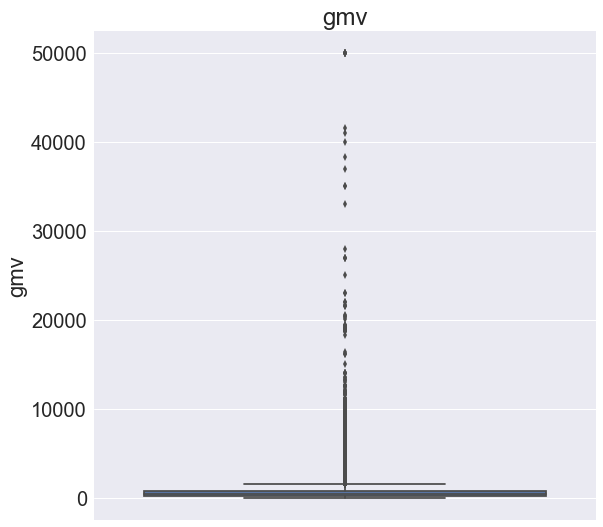

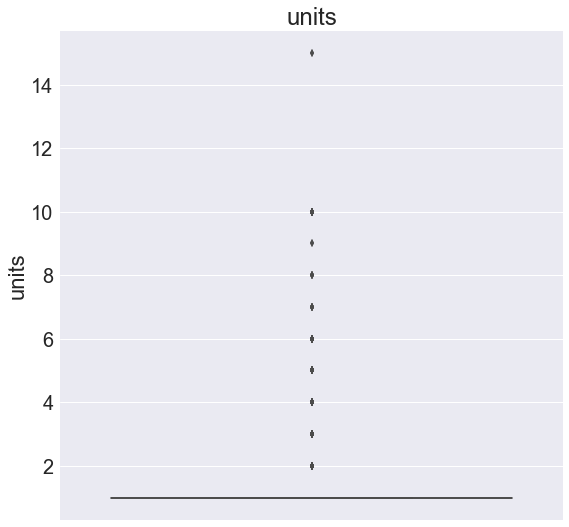

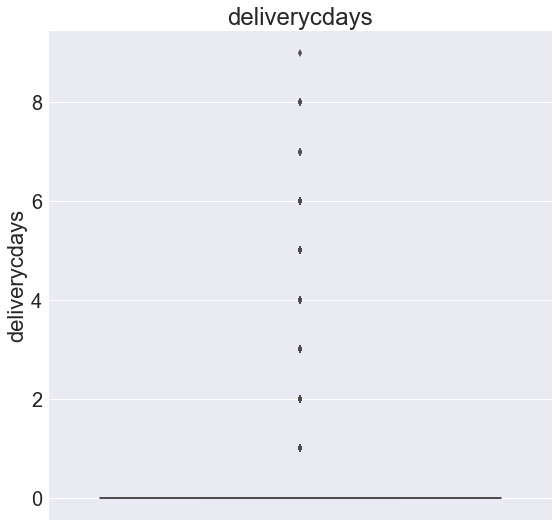

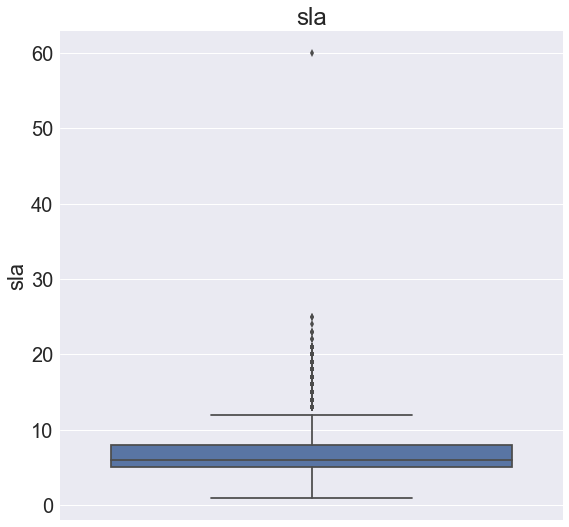

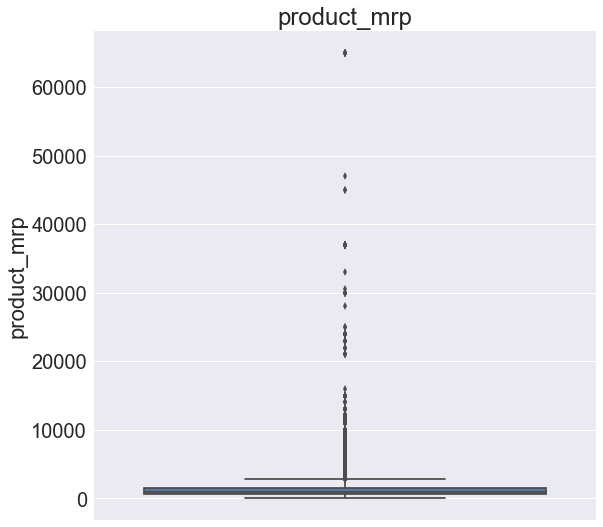

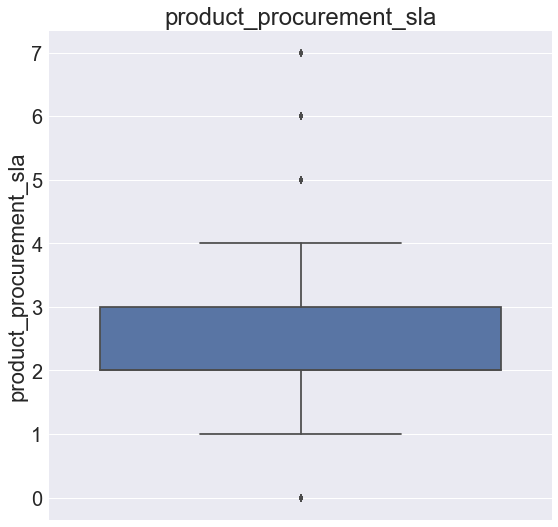

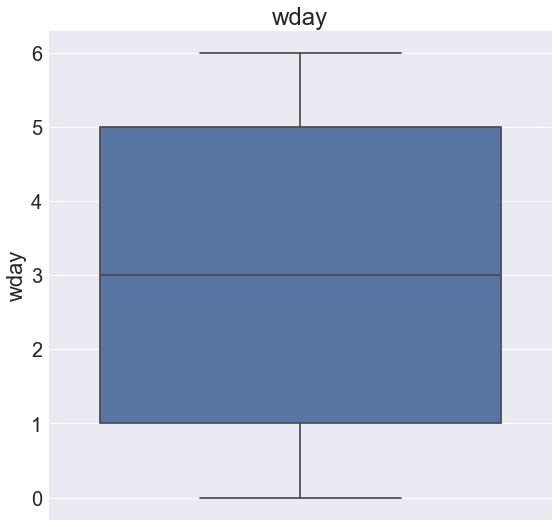

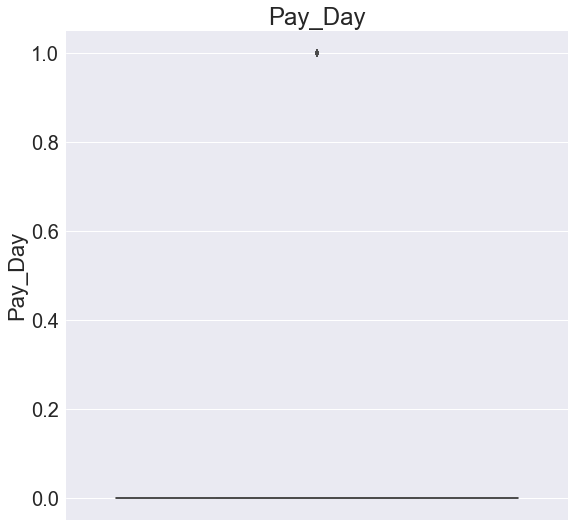

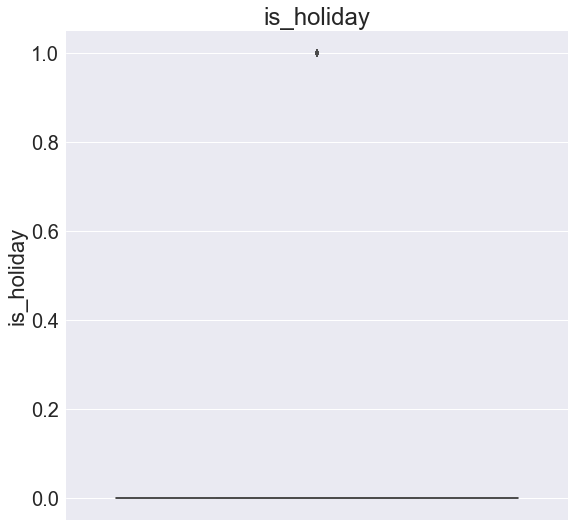

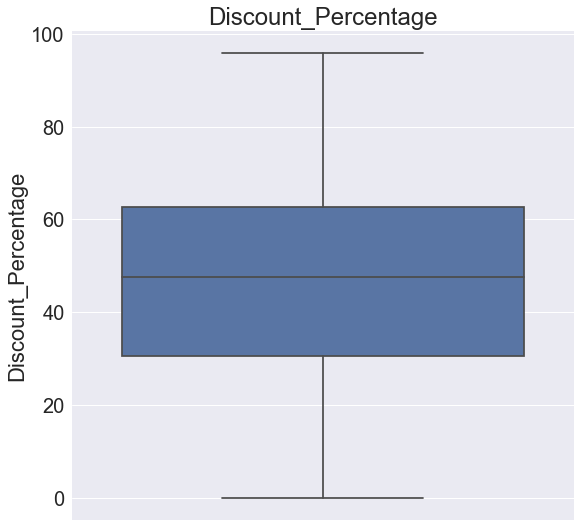

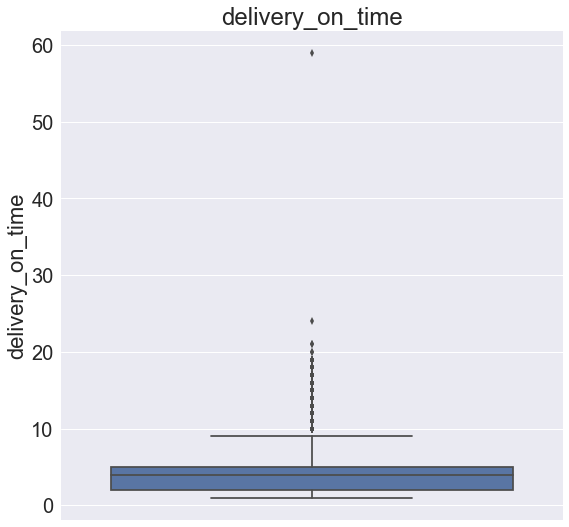

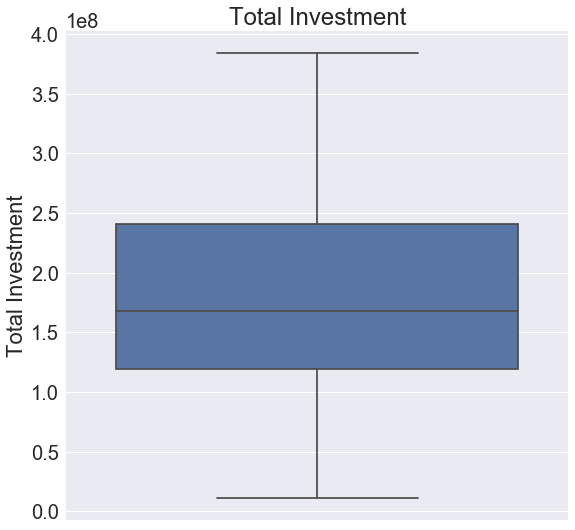

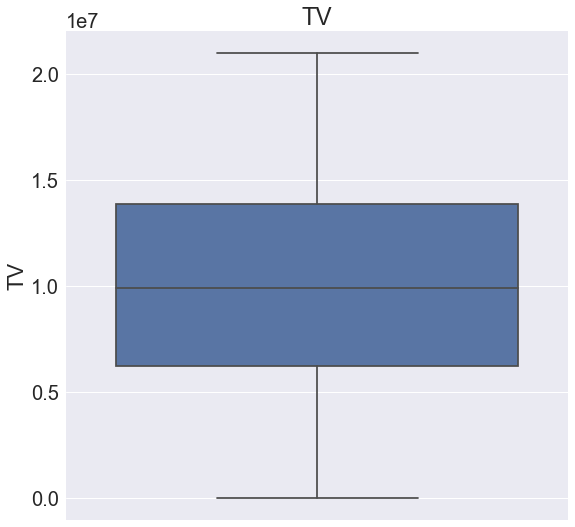

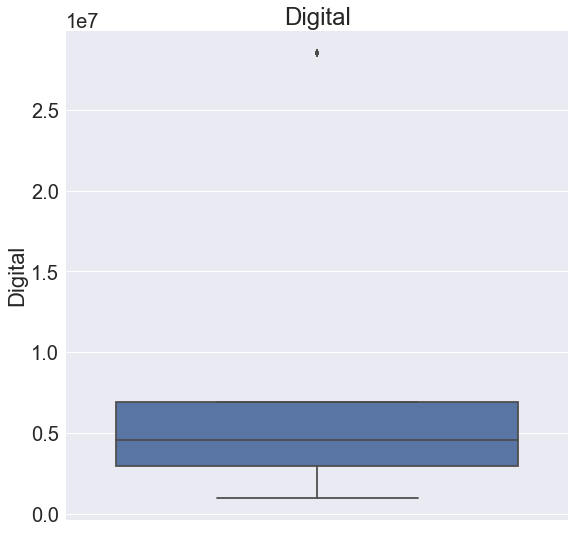

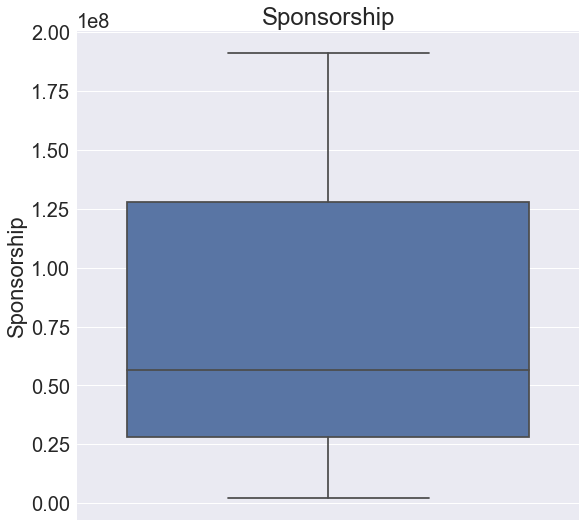

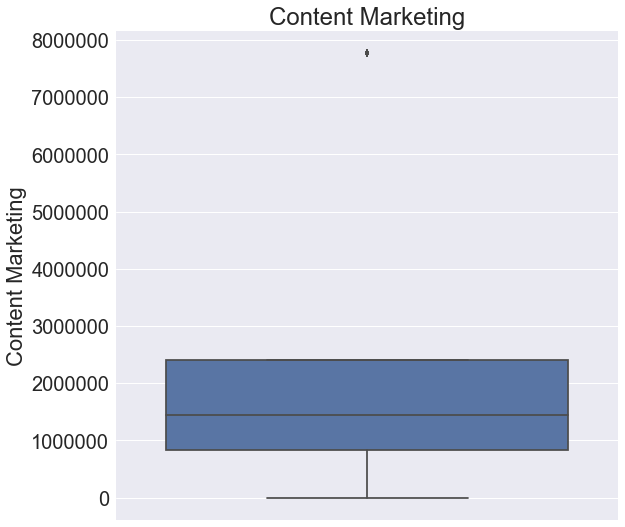

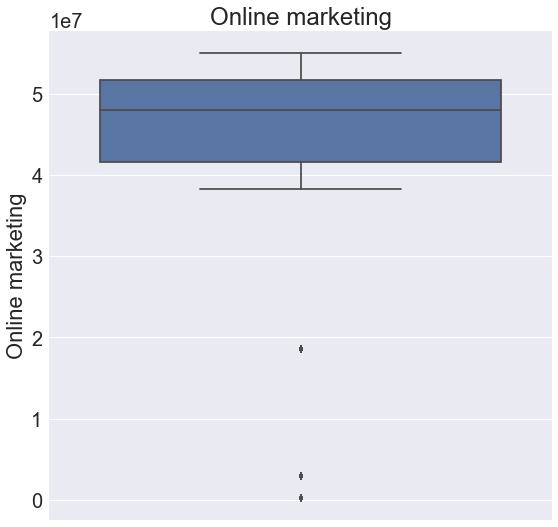

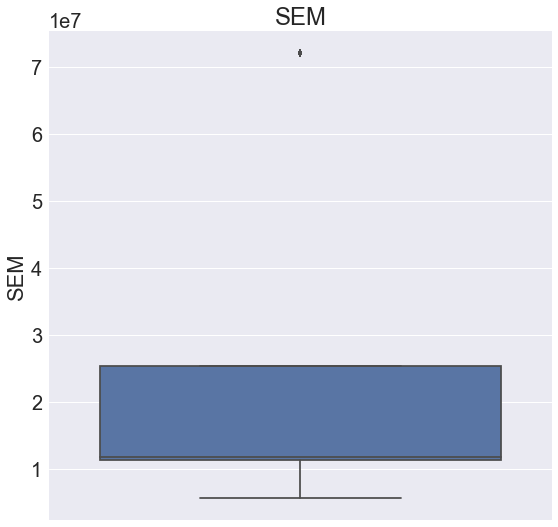

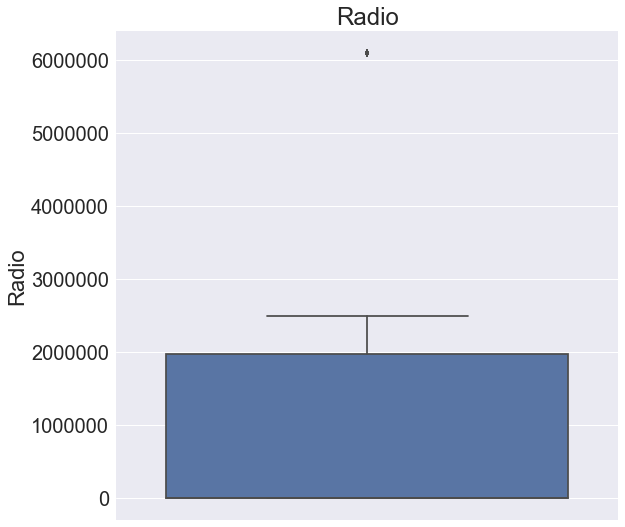

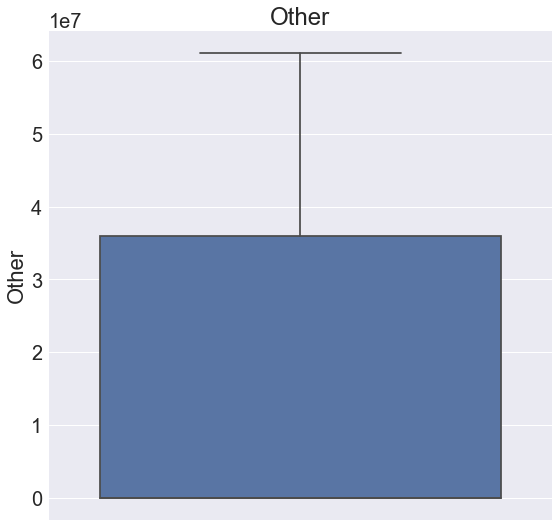

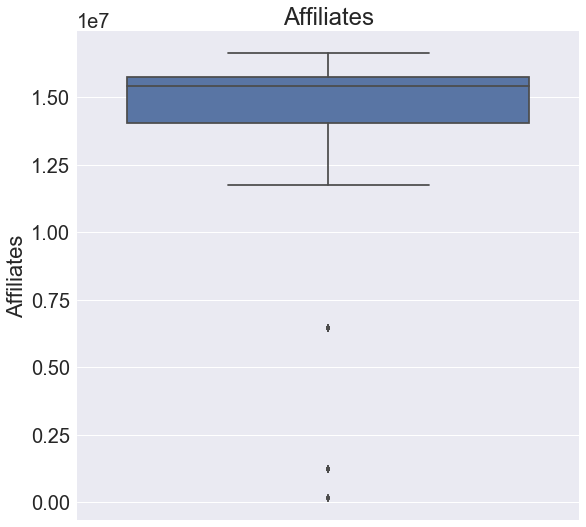

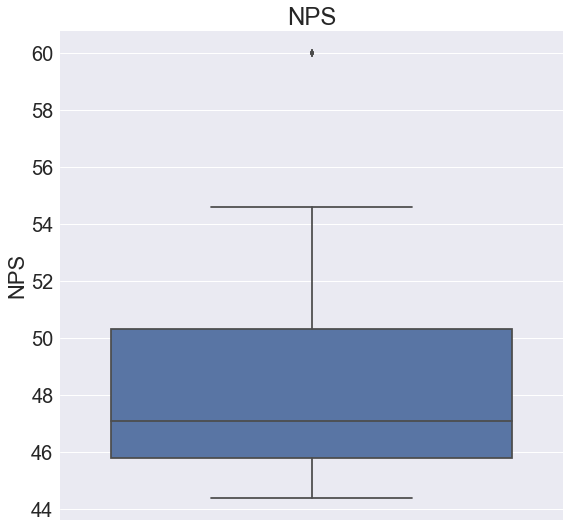

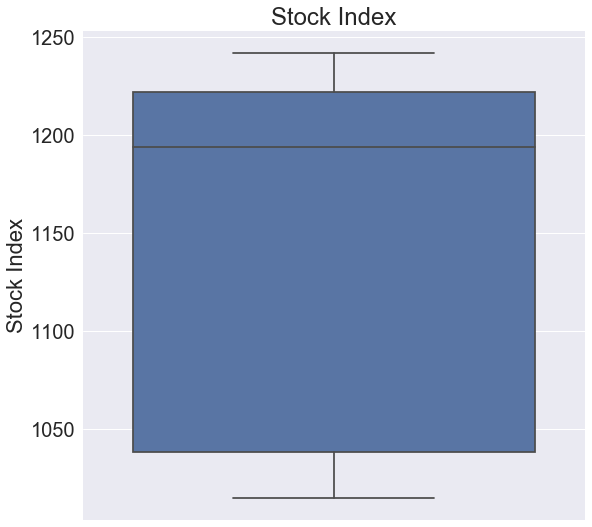

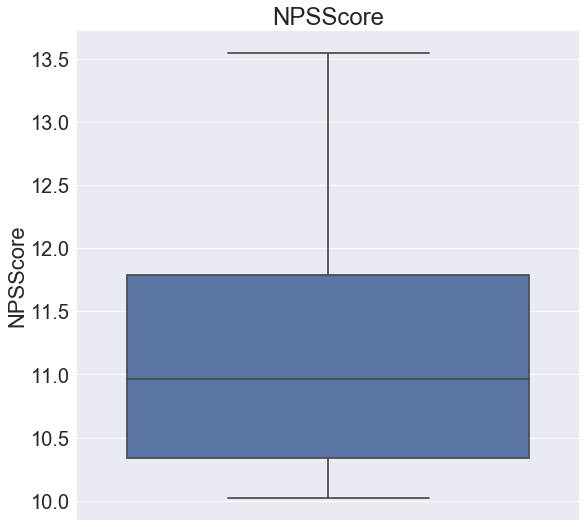

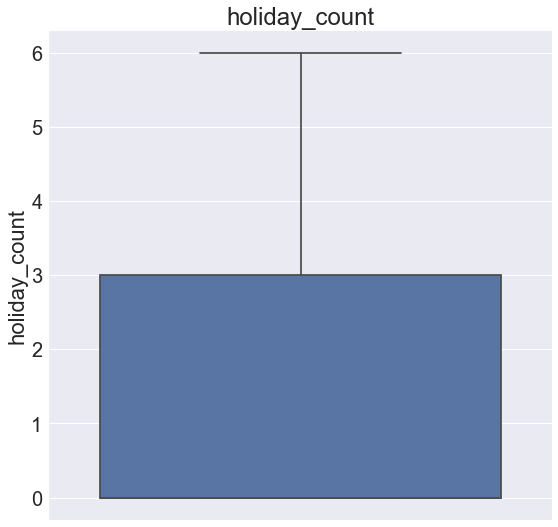

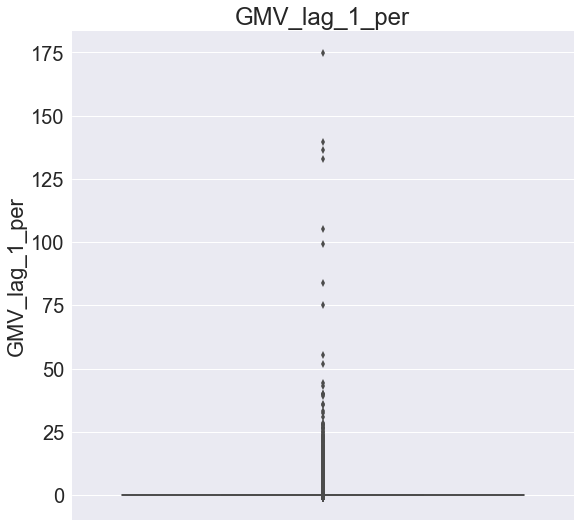

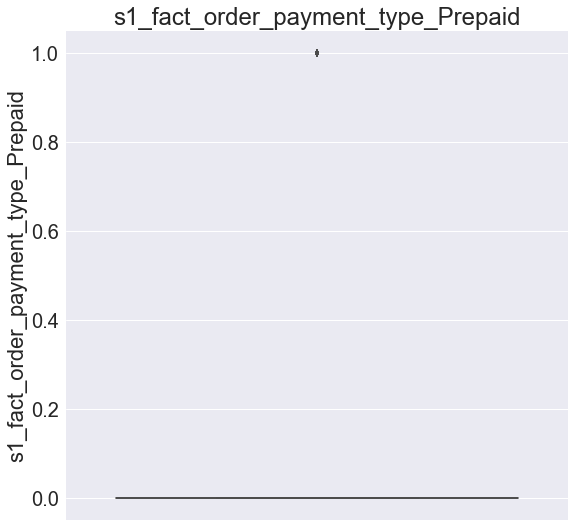

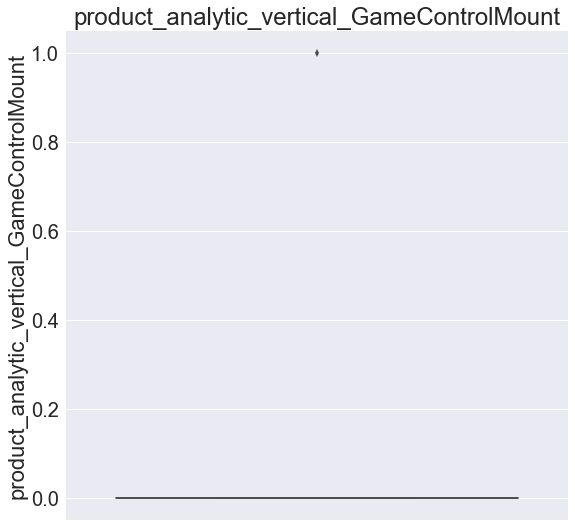

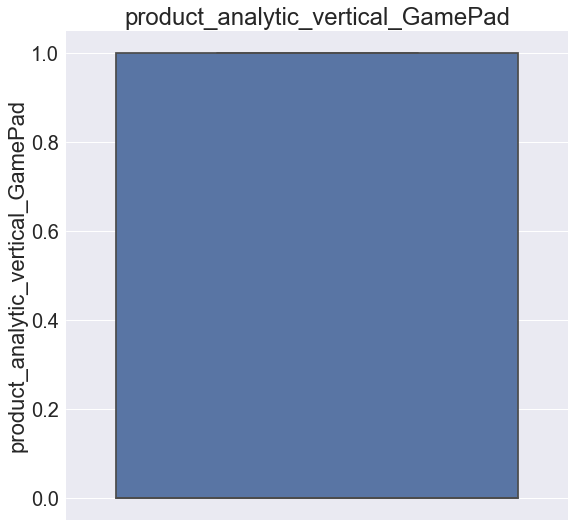

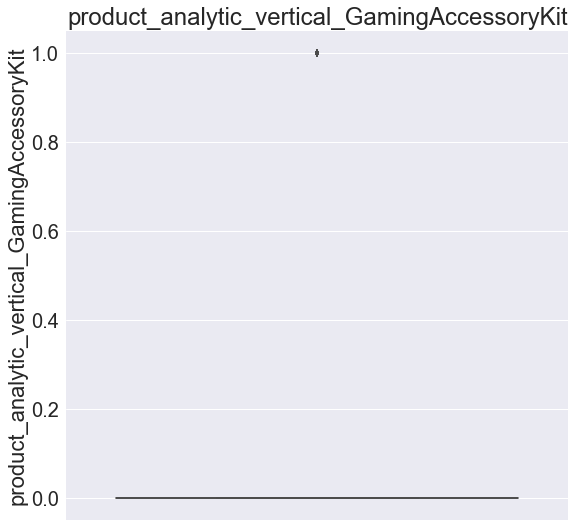

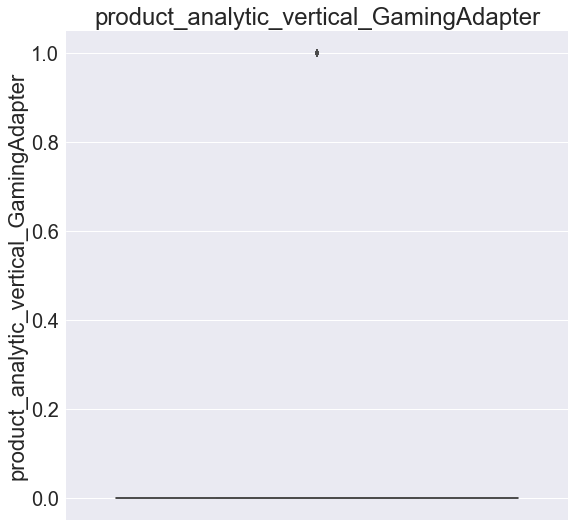

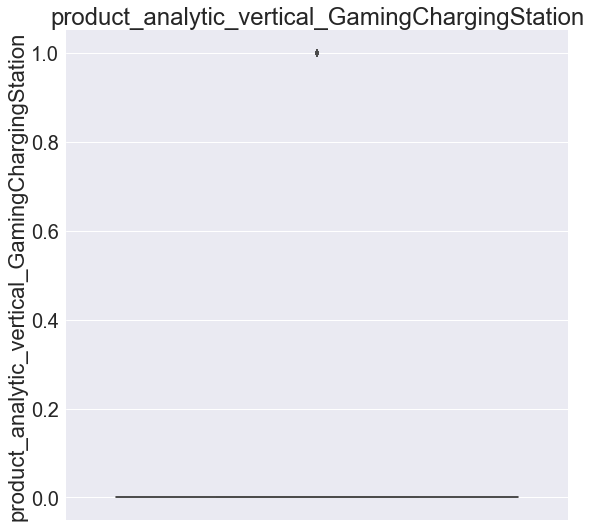

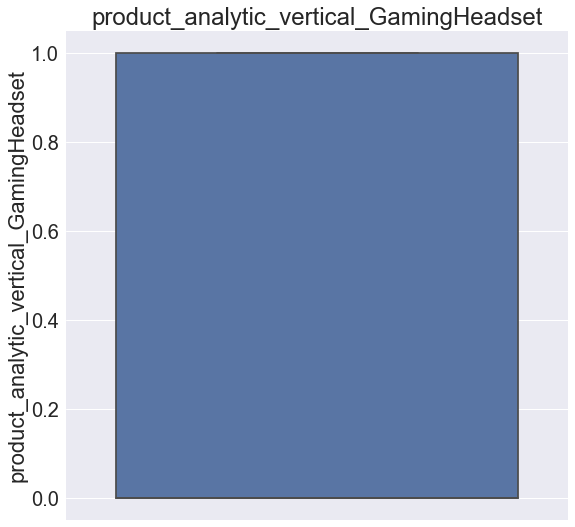

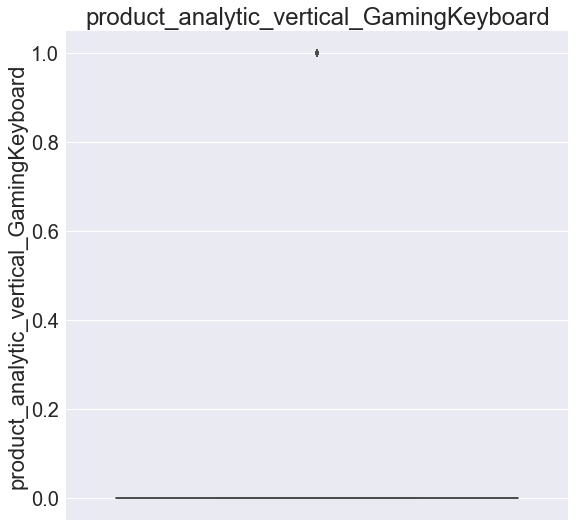

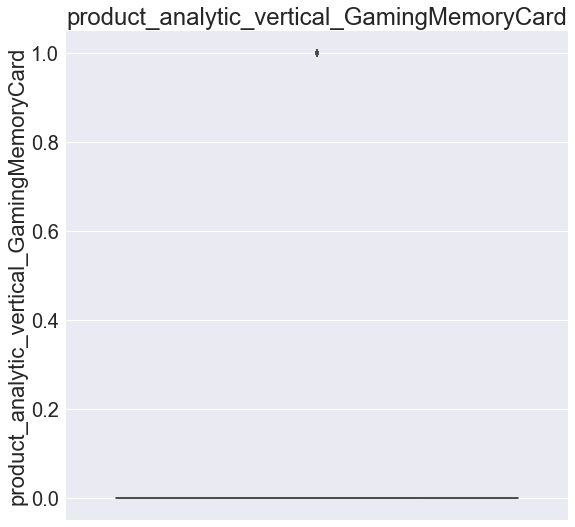

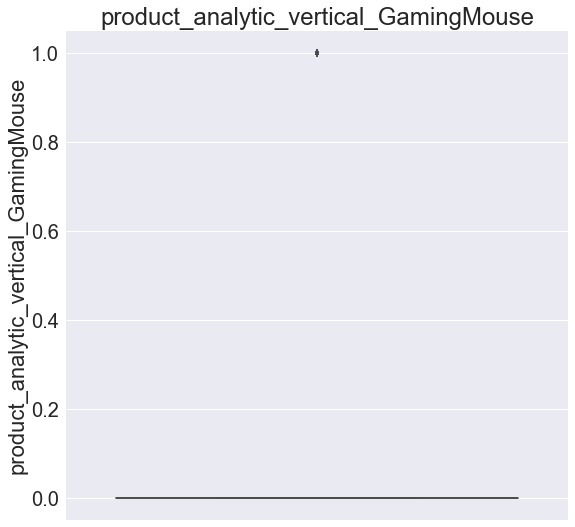

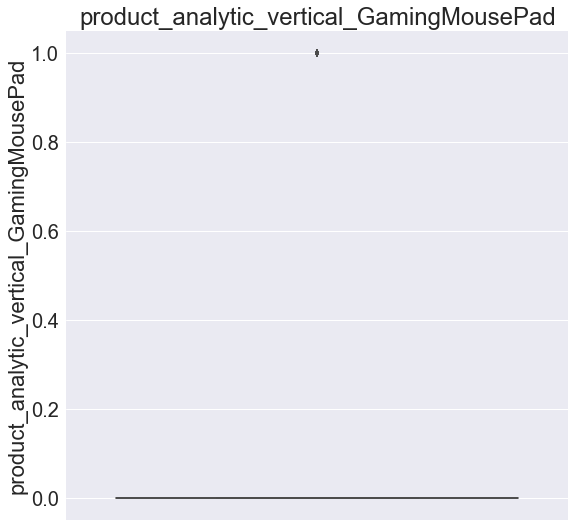

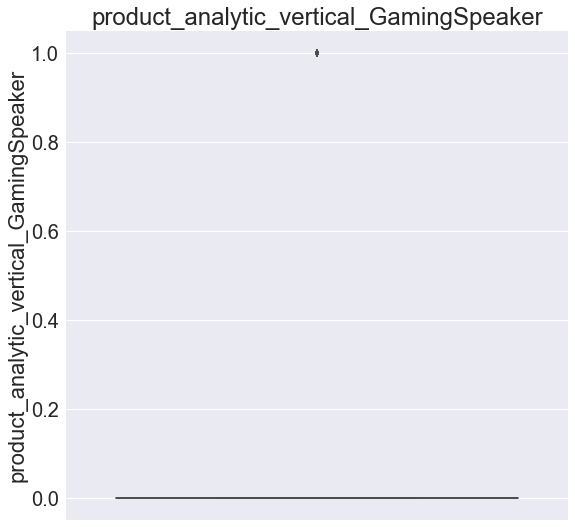

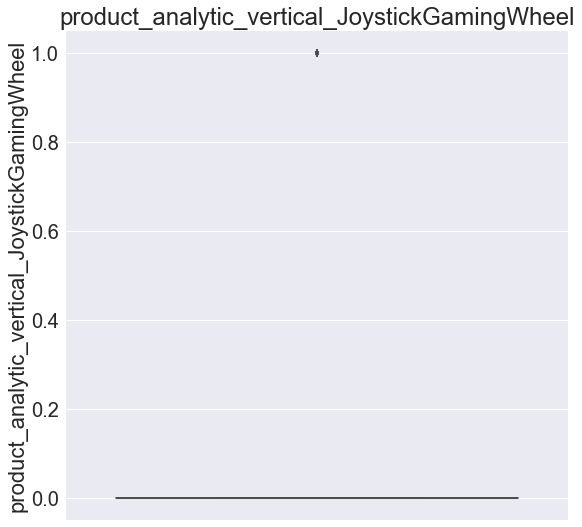

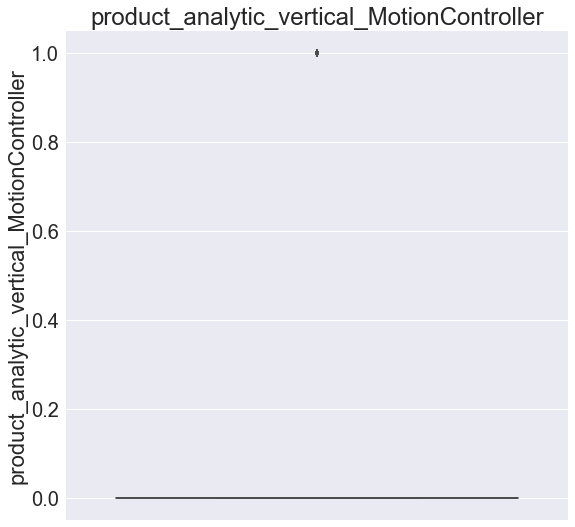

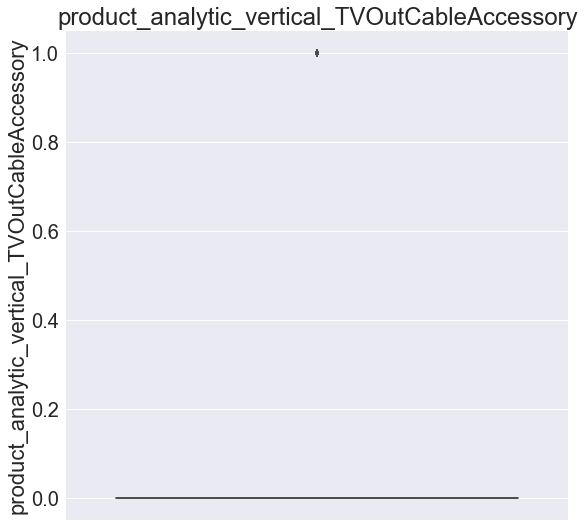

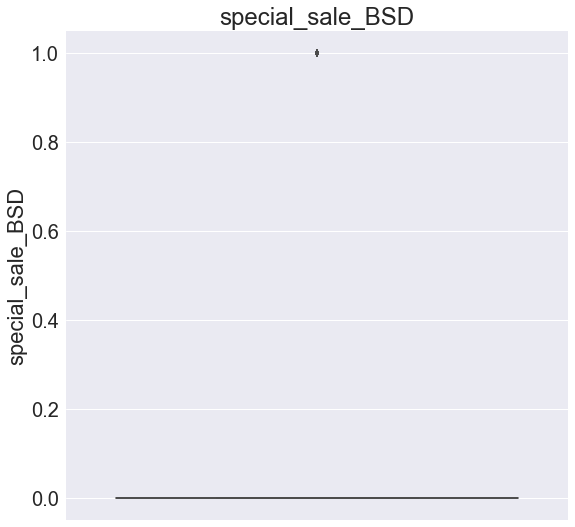

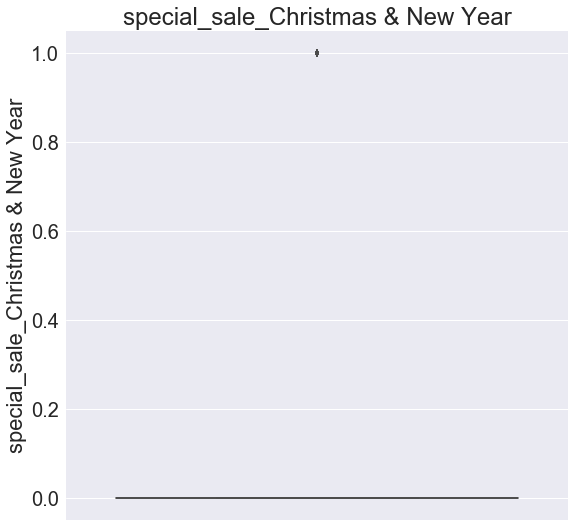

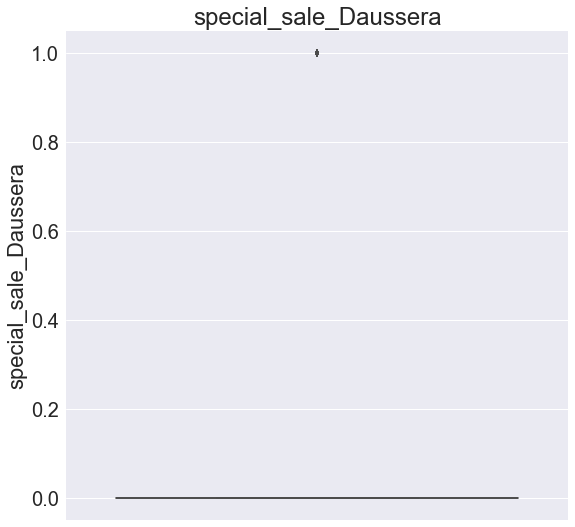

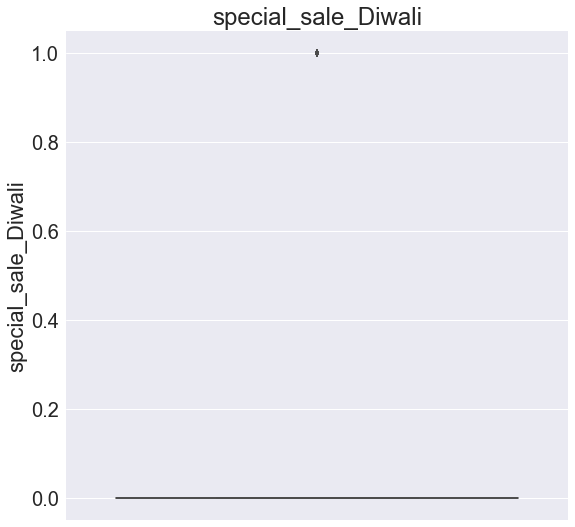

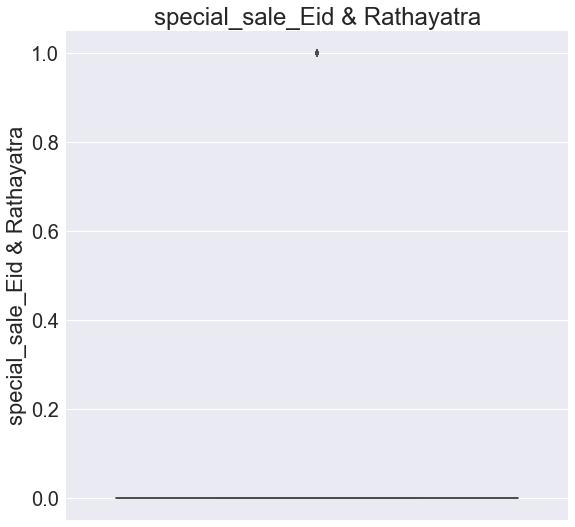

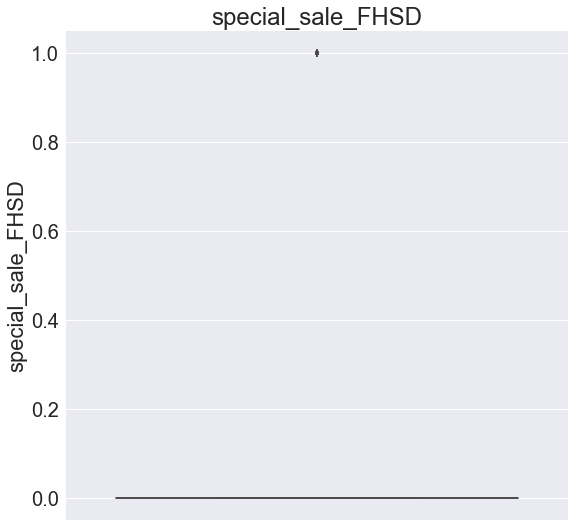

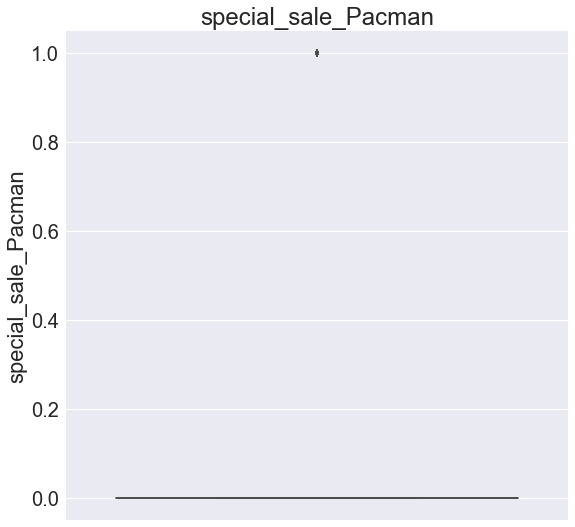

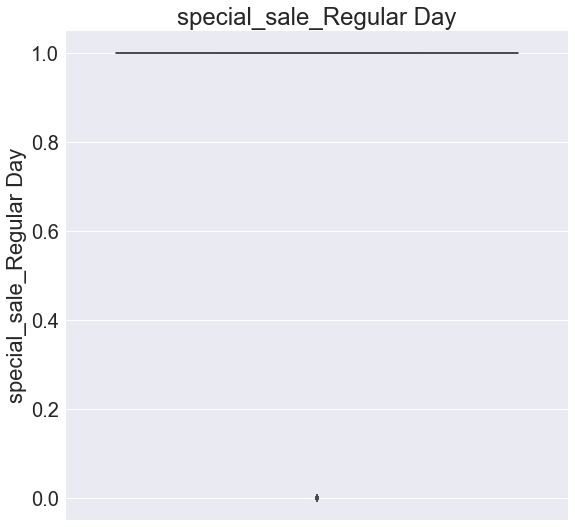

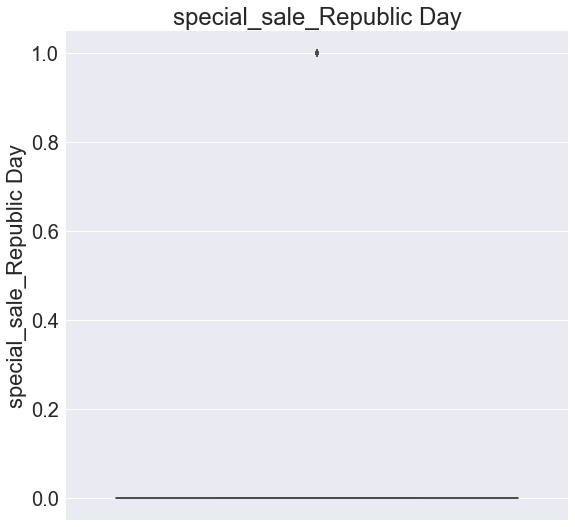

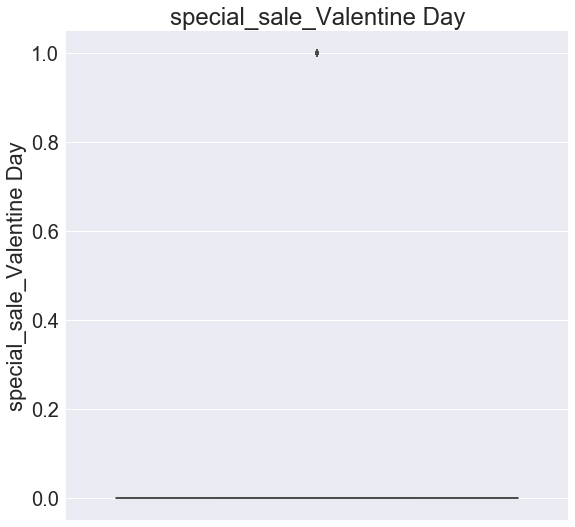

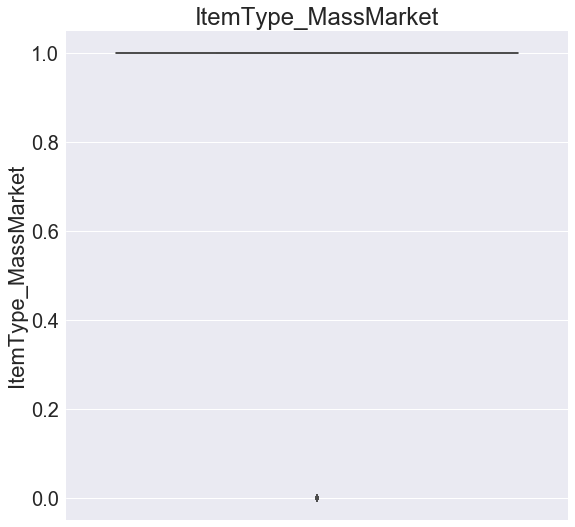

In [26]:
for col in list(GA.columns):
    plt.figure(figsize=(9,9))
    sns.boxplot(data=GA, y=col).set_title(col)
    

In [27]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [28]:
outlier_cols = ['gmv', 'units', 'deliverycdays', 'sla', 'product_mrp', 'delivery_on_time', 
               'Online marketing', 'SEM', 'Affiliates', 'Digital', 'Content Marketing', 'Radio']

In [29]:
    for col in outlier_cols:
        remove_outlier(GA, col)

In [30]:
GA.shape

(106810, 52)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
df_train, df_test = train_test_split(GA, train_size=0.7, test_size=0.3, random_state=100)

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()

In [35]:
GA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106810 entries, 0 to 170711
Data columns (total 52 columns):
gmv                                                106810 non-null float64
units                                              106810 non-null int64
deliverycdays                                      106810 non-null int64
sla                                                106810 non-null int64
product_mrp                                        106810 non-null float64
product_procurement_sla                            106810 non-null int64
wday                                               106810 non-null int64
Pay_Day                                            106810 non-null int64
is_holiday                                         106810 non-null int64
Discount_Percentage                                106810 non-null float64
delivery_on_time                                   106810 non-null float64
Total Investment                                   106810 non-null float64
TV 

In [36]:
GA['gmv'].unique()

array([3075., 2750., 3079., ..., 7183.,   82.,   42.])

In [37]:
# Create a list of the variables that you need to scale
varlist1 = []
dum_cols = list(dummies.columns)
dum_cols.append('Pay_Day')
dum_cols.append('is_holiday')

for col in GA.columns:
    if col not in dum_cols:
        varlist1.append(col)

In [38]:
# Scale these variables using 'fit_transform'
df_train[varlist1] = scaler.fit_transform(df_train[varlist1])

In [39]:
df_train.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
36102,0.01,0.00,0.00,0.25,0.03,0.71,0.00,0,0,0.72,...,0,0,0,0,0,0,1,0,0,1
98899,0.02,0.00,0.00,0.12,0.03,0.00,0.17,0,1,0.47,...,0,0,0,0,0,0,0,0,0,1
93860,0.01,0.07,0.00,0.21,0.00,0.14,0.17,0,0,0.33,...,0,0,0,0,0,0,1,0,0,1
637,0.01,0.00,0.00,0.29,0.03,0.71,0.67,0,0,0.73,...,0,0,0,0,0,0,1,0,0,1
41231,0.01,0.00,0.00,0.21,0.02,0.14,0.67,0,1,0.62,...,1,0,0,0,0,0,0,0,0,1


In [40]:
# Split the train dataset into X and y
y_train = df_train.pop('gmv')
X_train = df_train

In [41]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 1.43886361e-01 -2.37811726e-02  3.22679951e-02  7.72967614e-01
 -6.97504083e-03  3.80606572e-06  1.81964794e-04 -7.41805071e-04
 -2.53920204e-02 -2.75780129e-02 -5.05836133e+08  8.50344004e+08
  4.44752008e+09  5.26324905e+08  3.14534826e+09 -3.62484497e+09
 -7.96770319e+09  2.86128000e+09 -3.48328225e+09  3.41751871e+09
  2.49895581e+09  9.45789958e+07 -2.98345166e+09  1.99498105e-05
  1.30626565e-01 -6.65474007e-05  5.17953958e-04 -1.74099448e-03
  5.88400433e-04  9.77495204e-04 -7.78877728e-04 -3.82137434e-04
 -2.43634221e-04  5.36931853e-04 -4.78836292e-04 -8.04887346e-04
 -1.16811166e-02  3.24790187e-03  1.59164465e-03 -8.14295913e-04
  9.38429291e-04 -5.60422887e-04  6.59599708e-04  7.92149065e-04
  1.44694056e-03  8.34041940e-04  1.20880833e-03 -2.16267449e-04
  1.38629427e-03  7.35530627e-04 -1.23827867e-02]
104402854.49771899


In [43]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm, 15)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  

[ True False  True  True False False False False  True  True False  True
  True False  True False False False  True  True  True False  True False
  True False False False False False False False False False False False
  True False False False False False False False False False False False
 False False  True]
[ 1  8  1  1  9 37 34 25  1  1  6  1  1  2  1  7  5  3  1  1  1  4  1 36
  1 35 14 12 15 13 29 32 33 16 31 28  1 10 11 27 20 26 23 24 18 21 19 30
 17 22  1]


In [44]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,units,sla,product_mrp,Discount_Percentage,delivery_on_time,TV,Digital,Content Marketing,Other,Affiliates,NPS,NPSScore,GMV_lag_1_per,product_analytic_vertical_GamingSpeaker,ItemType_MassMarket
36102,1.00,0.00,0.25,0.03,0.72,0.05,0.58,0.21,0.31,0.00,0.93,0.09,0.09,0.01,0,1
98899,1.00,0.00,0.12,0.03,0.47,0.15,1.00,0.14,0.11,0.59,0.84,0.30,0.30,0.01,0,1
93860,1.00,0.07,0.21,0.00,0.33,0.20,1.00,0.14,0.11,0.59,0.84,0.30,0.30,0.01,0,1
637,1.00,0.00,0.29,0.03,0.73,0.10,0.66,1.00,1.00,0.00,0.95,0.00,0.00,0.01,0,1
41231,1.00,0.00,0.21,0.02,0.62,0.20,0.58,0.21,0.31,0.00,0.93,0.09,0.09,0.01,0,1


In [45]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 4.740e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:53:13   Log-Likelihood:             2.6239e+05
No. Observations:               74767   AIC:                        -5.247e+05
Df Residuals:                   74751   BIC:                        -5.246e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
# Creating a function for calculating VIF
def vif_calc(input_data):
    vif = pd.DataFrame()
    X = input_data
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [48]:
# Let's calculate VIF
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,350.90
7,Digital,123.61
8,Content Marketing,120.08
11,NPS,101.69
12,NPSScore,77.62
10,Affiliates,30.76
6,TV,10.01
9,Other,5.18
2,sla,4.14
5,delivery_on_time,4.10


In [49]:
X_train_rfe1 = X_train_rfe1.drop('NPS', axis=1)
lm_2 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 5.077e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:53:14   Log-Likelihood:             2.6238e+05
No. Observations:               74767   AIC:                        -5.247e+05
Df Residuals:                   74752   BIC:                        -5.246e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.0188      0.000     74.473      0.000       0.018       0.019
units                                       0.1413      0.001     98.194      0.000       0.138       0.144
sla                                         0.0073      0.001     13.336      0.000       0.006       0.008
product_mrp                                 0.7717      0.001    534.500      0.000       0.769       0.775
Discount_Percentage                        -0.0246      0.000   -202.004      0.000      -0.025      -0.024
delivery_on_time                           -0.0066      0.000    -14.644      0.000      -0.008      -0.006
TV                                         -0.0013      0.000     -5.043      0.000      -0.002      -0.001
Digital                                     0.0091      0.001     11.768      0.000       0.008       0.011
Content Marketing                          -0.0086      0.001    -10.714      0.000      -0.010      -0.007
Other                                       0.0012      0.000      7.264      0.000       0.001       0.001
Affiliates                                  0.0036      0.000     12.550      0.000       0.003       0.004
NPSScore                                    0.0006      0.000      2.517      0.012       0.000       0.001
GMV_lag_1_per                               0.1400      0.004     38.700      0.000       0.133       0.147
product_analytic_vertical_GamingSpeaker    -0.0112      0.001    -20.282      0.000      -0.012      -0.010
ItemType_MassMarket                        -0.0123      0.000    -79.685      0.000      -0.013      -0.012
==============================================================================
Omnibus:                    95808.336   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        364747160.834
Skew:                           6.017   Prob(JB):                         0.00
Kurtosis:                     344.962   Cond. No.                         259.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,90.69
8,Content Marketing,89.37
7,Digital,87.79
10,Affiliates,6.14
6,TV,5.84
9,Other,5.08
2,sla,4.14
5,delivery_on_time,4.10
11,NPSScore,3.70
14,ItemType_MassMarket,1.81


In [51]:
# X_train_rfe1 = X_train_rfe1.drop('Online marketing', axis=1)
X_train_rfe1 = X_train_rfe1.drop('Digital', axis=1)

lm_3 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 5.456e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:53:15   Log-Likelihood:             2.6231e+05
No. Observations:               74767   AIC:                        -5.246e+05
Df Residuals:                   74753   BIC:                        -5.245e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.0195      0.000     80.179      0.000       0.019       0.020
units                                       0.1413      0.001     98.109      0.000       0.138       0.144
sla                                         0.0069      0.001     12.779      0.000       0.006       0.008
product_mrp                                 0.7711      0.001    533.927      0.000       0.768       0.774
Discount_Percentage                        -0.0246      0.000   -202.523      0.000      -0.025      -0.024
delivery_on_time                           -0.0065      0.000    -14.246      0.000      -0.007      -0.006
TV                                          0.0013      0.000     10.109      0.000       0.001       0.002
Content Marketing                           0.0007      0.000      5.907      0.000       0.000       0.001
Other                                      -0.0005   8.05e-05     -5.682      0.000      -0.001      -0.000
Affiliates                                  0.0007      0.000      4.687      0.000       0.000       0.001
NPSScore                                    0.0020      0.000     10.136      0.000       0.002       0.002
GMV_lag_1_per                               0.1402      0.004     38.737      0.000       0.133       0.147
product_analytic_vertical_GamingSpeaker    -0.0114      0.001    -20.464      0.000      -0.012      -0.010
ItemType_MassMarket                        -0.0123      0.000    -79.652      0.000      -0.013      -0.012
==============================================================================
Omnibus:                    95864.201   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        362733241.140
Skew:                           6.027   Prob(JB):                         0.00
Kurtosis:                     344.015   Cond. No.                         257.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,84.61
2,sla,4.13
5,delivery_on_time,4.10
10,NPSScore,2.69
7,Content Marketing,2.13
13,ItemType_MassMarket,1.81
3,product_mrp,1.80
9,Affiliates,1.50
6,TV,1.49
8,Other,1.30


In [53]:
X_train_rfe1 = X_train_rfe1.drop('const', axis=1)
lm_4 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 7.071e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:53:16   Log-Likelihood:             2.5922e+05
No. Observations:               74767   AIC:                        -5.184e+05
Df Residuals:                   74754   BIC:                        -5.183e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
units                                       0.1437      0.002     95.775      0.000       0.141       0.147
sla                                         0.0179      0.001     32.584      0.000       0.017       0.019
product_mrp                                 0.8262      0.001    624.177      0.000       0.824       0.829
Discount_Percentage                        -0.0250      0.000   -197.099      0.000      -0.025      -0.025
delivery_on_time                           -0.0118      0.000    -25.319      0.000      -0.013      -0.011
TV                                          0.0038      0.000     29.844      0.000       0.004       0.004
Content Marketing                           0.0038      0.000     30.902      0.000       0.004       0.004
Other                                   -2.403e-06   8.37e-05     -0.029      0.977      -0.000       0.000
Affiliates                                  0.0061      0.000     47.226      0.000       0.006       0.006
NPSScore                                    0.0110      0.000     63.783      0.000       0.011       0.011
GMV_lag_1_per                               0.1506      0.004     39.952      0.000       0.143       0.158
product_analytic_vertical_GamingSpeaker    -0.0128      0.001    -22.227      0.000      -0.014      -0.012
ItemType_MassMarket                        -0.0047      0.000    -36.766      0.000      -0.005      -0.004
==============================================================================
Omnibus:                    67532.074   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        212232284.561
Skew:                           2.968   Prob(JB):                         0.00
Kurtosis:                     263.942   Cond. No.                         218.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
1,sla,23.70
12,ItemType_MassMarket,19.94
8,Affiliates,17.47
4,delivery_on_time,11.13
5,TV,7.00
3,Discount_Percentage,6.15
9,NPSScore,4.93
6,Content Marketing,3.56
2,product_mrp,2.25
7,Other,1.80


In [55]:
# X_train_rfe1 = X_train_rfe1.drop('Sponsorship', axis=1)
X_train_rfe1 = X_train_rfe1.drop('sla', axis=1)

lm_5 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                 7.544e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:53:17   Log-Likelihood:             2.5870e+05
No. Observations:               74767   AIC:                        -5.174e+05
Df Residuals:                   74755   BIC:                        -5.173e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
units                                       0.1433      0.002     94.823      0.000       0.140       0.146
product_mrp                                 0.8305      0.001    626.044      0.000       0.828       0.833
Discount_Percentage                        -0.0243      0.000   -193.023      0.000      -0.025      -0.024
delivery_on_time                            0.0014      0.000      5.918      0.000       0.001       0.002
TV                                          0.0041      0.000     31.961      0.000       0.004       0.004
Content Marketing                           0.0042      0.000     34.085      0.000       0.004       0.004
Other                                       0.0001   8.42e-05      1.353      0.176   -5.11e-05       0.000
Affiliates                                  0.0067      0.000     51.344      0.000       0.006       0.007
NPSScore                                    0.0121      0.000     71.383      0.000       0.012       0.012
GMV_lag_1_per                               0.1532      0.004     40.359      0.000       0.146       0.161
product_analytic_vertical_GamingSpeaker    -0.0130      0.001    -22.278      0.000      -0.014      -0.012
ItemType_MassMarket                        -0.0042      0.000    -33.327      0.000      -0.004      -0.004
==============================================================================
Omnibus:                    65048.885   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        204087952.791
Skew:                           2.751   Prob(JB):                         0.00
Kurtosis:                     258.893   Cond. No.                         215.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
11,ItemType_MassMarket,19.73
7,Affiliates,17.20
4,TV,6.97
2,Discount_Percentage,5.99
8,NPSScore,4.73
5,Content Marketing,3.53
3,delivery_on_time,2.75
1,product_mrp,2.23
6,Other,1.80
9,GMV_lag_1_per,1.80


In [57]:
X_train_rfe1 = X_train_rfe1.drop('Affiliates', axis=1)
lm_6 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 7.926e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:53:17   Log-Likelihood:             2.5740e+05
No. Observations:               74767   AIC:                        -5.148e+05
Df Residuals:                   74756   BIC:                        -5.147e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
units                                       0.1425      0.002     92.687      0.000       0.139       0.146
product_mrp                                 0.8483      0.001    651.143      0.000       0.846       0.851
Discount_Percentage                        -0.0236      0.000   -185.317      0.000      -0.024      -0.023
delivery_on_time                            0.0019      0.000      7.871      0.000       0.001       0.002
TV                                          0.0066      0.000     54.768      0.000       0.006       0.007
Content Marketing                           0.0059      0.000     48.806      0.000       0.006       0.006
Other                                       0.0010    8.4e-05     11.453      0.000       0.001       0.001
NPSScore                                    0.0124      0.000     71.908      0.000       0.012       0.013
GMV_lag_1_per                               0.1593      0.004     41.272      0.000       0.152       0.167
product_analytic_vertical_GamingSpeaker    -0.0131      0.001    -22.166      0.000      -0.014      -0.012
ItemType_MassMarket                        -0.0013      0.000    -11.206      0.000      -0.002      -0.001
==============================================================================
Omnibus:                    54436.654   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        177044003.930
Skew:                           1.891   Prob(JB):                         0.00
Kurtosis:                     241.362   Cond. No.                         180.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
10,ItemType_MassMarket,15.72
4,TV,5.96
2,Discount_Percentage,5.92
7,NPSScore,4.72
5,Content Marketing,3.27
3,delivery_on_time,2.74
1,product_mrp,2.08
8,GMV_lag_1_per,1.80
6,Other,1.73
0,units,1.05


In [59]:
X_train_rfe1 = X_train_rfe1.drop('ItemType_MassMarket', axis=1)
lm_7 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 8.703e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:53:18   Log-Likelihood:             2.5734e+05
No. Observations:               74767   AIC:                        -5.147e+05
Df Residuals:                   74757   BIC:                        -5.146e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
units                                       0.1426      0.002     92.668      0.000       0.140       0.146
product_mrp                                 0.8545      0.001    725.062      0.000       0.852       0.857
Discount_Percentage                        -0.0242      0.000   -214.005      0.000      -0.024      -0.024
delivery_on_time                            0.0013      0.000      5.517      0.000       0.001       0.002
TV                                          0.0060      0.000     55.533      0.000       0.006       0.006
Content Marketing                           0.0053      0.000     48.908      0.000       0.005       0.006
Other                                       0.0008   8.31e-05      9.868      0.000       0.001       0.001
NPSScore                                    0.0112      0.000     83.277      0.000       0.011       0.011
GMV_lag_1_per                               0.1542      0.004     40.188      0.000       0.147       0.162
product_analytic_vertical_GamingSpeaker    -0.0133      0.001    -22.435      0.000      -0.014      -0.012
==============================================================================
Omnibus:                    52711.578   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        175112474.043
Skew:                           1.759   Prob(JB):                         0.00
Kurtosis:                     240.062   Cond. No.                         123.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
4,TV,4.78
2,Discount_Percentage,4.68
7,NPSScore,2.86
5,Content Marketing,2.62
3,delivery_on_time,2.61
8,GMV_lag_1_per,1.77
1,product_mrp,1.70
6,Other,1.69
0,units,1.05
9,product_analytic_vertical_GamingSpeaker,1.01


In [61]:
# Predicting using the 12th model
y_train_price = lm_7.predict(X_train_rfe1)

C:\Users\aingale\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'errors')

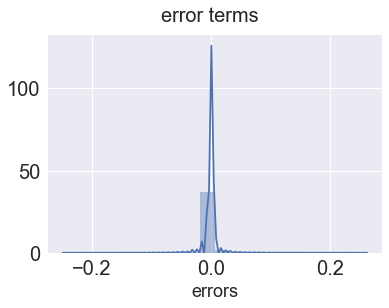

In [62]:
# lets plot an histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('error terms', fontsize = 20) 
plt.xlabel('errors', fontsize = 18)  

In [63]:
df_test[varlist1] = scaler.transform(df_test[varlist1])

In [64]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [65]:
# Let's check the list 'col2' which had the 10 variables RFE had selected
X_test_rfe2 = X_test[col1]

In [66]:
X_test_rfe2.columns

Index(['units', 'sla', 'product_mrp', 'Discount_Percentage',
       'delivery_on_time', 'TV', 'Digital', 'Content Marketing', 'Other',
       'Affiliates', 'NPS', 'NPSScore', 'GMV_lag_1_per',
       'product_analytic_vertical_GamingSpeaker', 'ItemType_MassMarket'],
      dtype='object')

In [67]:
X_train_rfe1.columns

Index(['units', 'product_mrp', 'Discount_Percentage', 'delivery_on_time', 'TV',
       'Content Marketing', 'Other', 'NPSScore', 'GMV_lag_1_per',
       'product_analytic_vertical_GamingSpeaker'],
      dtype='object')

In [68]:
# Let's now drop the variables we had manually eliminated as well
#X_test_rfe2 =X_test_rfe2[col]
#X_test = df_test
X_test_rfe2 = X_test_rfe2[X_train_rfe1.columns]

In [69]:
X_test_rfe2.columns

Index(['units', 'product_mrp', 'Discount_Percentage', 'delivery_on_time', 'TV',
       'Content Marketing', 'Other', 'NPSScore', 'GMV_lag_1_per',
       'product_analytic_vertical_GamingSpeaker'],
      dtype='object')

In [70]:
# Add a constant to the test set created
#X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32043 entries, 68104 to 66491
Data columns (total 10 columns):
units                                      32043 non-null float64
product_mrp                                32043 non-null float64
Discount_Percentage                        32043 non-null float64
delivery_on_time                           32043 non-null float64
TV                                         32043 non-null float64
Content Marketing                          32043 non-null float64
Other                                      32043 non-null float64
NPSScore                                   32043 non-null float64
GMV_lag_1_per                              32043 non-null float64
product_analytic_vertical_GamingSpeaker    32043 non-null uint8
dtypes: float64(9), uint8(1)
memory usage: 2.5 MB


In [71]:
# Making predictions
y_pred = lm_7.predict(X_test_rfe2)

In [72]:
print(X_test_rfe2.shape)
print(X_train_rfe1.shape)

(32043, 10)
(74767, 10)


Text(0,0.5,'y_pred')

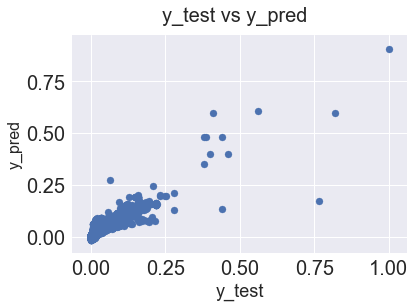

In [73]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [74]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8732930197312997

In [75]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [76]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

0.00791821380481561

In [77]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import numpy as np

In [78]:
regr = LinearRegression() 
  
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
regr.score(X_test, y_test)

0.8937478419606185

In [80]:
scores = cross_val_score(regr, X_train, y_train, cv = 5)    #cv is the number of folds, scores will give an array of scores

print('Cross Validation scores: ', scores)

print('Mean and std deviation: ', np.mean(scores), np.std(scores))

#To get predictions (y_hat) and check them all in one using cross validation

predictions = cross_val_predict(regr, X_test, y_test, cv = 5)     #y_test is needed here in predictions to get scores for each fold of cv

accuracy = metrics.r2_score(y_test, predictions)  #this says the accuracy of the predictions from the best cv fold


#If this is good, continue to fit the model on the data


regr.fit(X_train, y_train)

y_hat = regr.predict(X_test)      #this gives me my predictions

regr.score(X_test, y_test)  

Cross Validation scores:  [0.91386758 0.90536463 0.88624114 0.90244832 0.9090954 ]
Mean and std deviation:  0.9034034149784465 0.009393612464566301


0.8937478419606185